# Analyse tracks

This is the analysis notebook. All data preparation is done in `track_organoids.ipynb`. For each of the files listed in `files`, the following steps are performed:

 - load mean organoid statistics
 - compare mean velocities between experimental conditions

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [50]:
analysis_image_dir = '/Users/clemence/Documents_Clémence/Analysis/Tracking algorithm/Tracking-seg_Aaron-Gus_CNV/To run/analysis_image'

if not os.path.exists(analysis_image_dir):
    os.makedirs(analysis_image_dir)


average_property_frame = pd.DataFrame()

path_to_data = '/Users/clemence/Documents_Clémence/Analysis/Tracking algorithm/Tracking-seg_Aaron-Gus_CNV/To run/organoid_statistics'
path_to_average_data = '/Users/clemence/Documents_Clémence/Analysis/Tracking algorithm/Tracking-seg_Aaron-Gus_CNV/To run/organoid_statistics/average_organoid_properties'

for ename in os.listdir(path_to_average_data):
    for cname in os.listdir(os.path.join(path_to_average_data,ename)):
        
        fname = os.path.join(path_to_average_data,ename,cname,os.listdir(os.path.join(path_to_average_data,ename,cname))[0])

        average_organoid_statistics = pd.read_csv(fname)
        average_organoid_statistics['experiment_name'] = ename
        average_organoid_statistics['experiment_conditions'] = cname

        average_property_frame = pd.concat([average_property_frame, average_organoid_statistics], axis = 0)

average_property_frame.index = np.arange(len(average_property_frame))


velocity_stats = pd.DataFrame()

path_to_data = '/Users/clemence/Documents_Clémence/Analysis/Tracking algorithm/Tracking-seg_Aaron-Gus_CNV/To run/organoid_statistics'
path_to_average_data = '/Users/clemence/Documents_Clémence/Analysis/Tracking algorithm/Tracking-seg_Aaron-Gus_CNV/To run/organoid_statistics/trajectory_properties'

for ename in os.listdir(path_to_average_data):
    for cname in os.listdir(os.path.join(path_to_average_data,ename)):
        
        fname = os.path.join(path_to_average_data,ename,cname,os.listdir(os.path.join(path_to_average_data,ename,cname))[0])

        velocity_organoid_statistics = pd.read_csv(fname)
        velocity_organoid_statistics['experiment_name'] = ename
        velocity_organoid_statistics['experiment_conditions'] = cname

        velocity_stats = pd.concat([velocity_stats, velocity_organoid_statistics], axis = 0)

velocity_stats.index = np.arange(len(velocity_stats))

In [33]:
# replace 'ename' by the name of the experimental folder to be analysed
experiment_to_analyse = ename

organoid_statistics = average_property_frame[average_property_frame.experiment_name == experiment_to_analyse]
velocity_stats = velocity_stats[velocity_stats.experiment_name == experiment_to_analyse]

experiment_analysis_image_dir = os.path.join(analysis_image_dir, experiment_to_analyse)

if not os.path.exists(experiment_analysis_image_dir):
    os.makedirs(experiment_analysis_image_dir)

## Analysing instantaneous data

We compare the experiment properties as a function of time. Here we mostly choose to compare the velocity of the spheroids in different conditions as well as the evolution of their circularity.

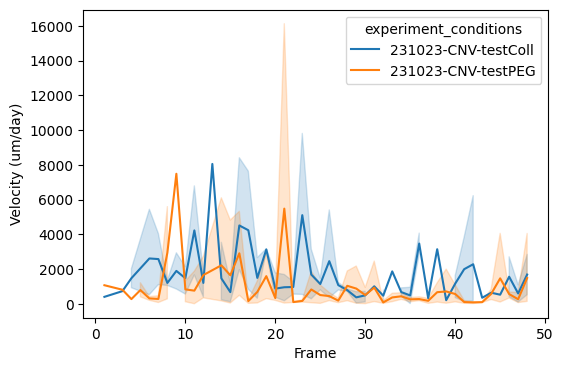

In [52]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(data=velocity_stats, x='frame', y='velocity', hue='experiment_conditions')

ax.set_xlabel('Frame')
ax.set_ylabel('Velocity (um/day)')

plt.savefig(os.path.join(experiment_analysis_image_dir, experiment_to_analyse + '_' + 'velocities_per_time.pdf'))

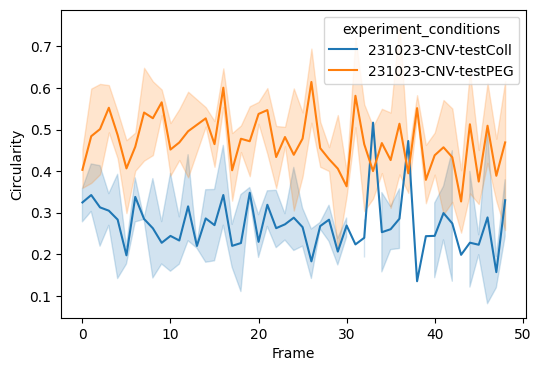

In [53]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.lineplot(data=velocity_stats, x='frame', y='circularity', hue='experiment_conditions')

ax.set_xlabel('Frame')
ax.set_ylabel('Circularity')

plt.savefig(os.path.join(experiment_analysis_image_dir, experiment_to_analyse + '_' + 'circularities_per_time.pdf'))

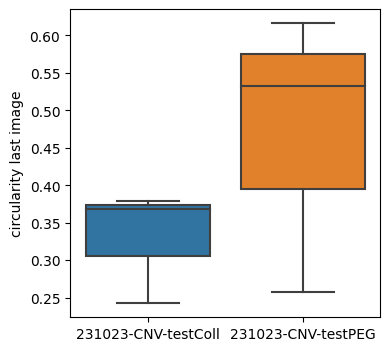

In [36]:
fig, ax = plt.subplots(figsize=(4, 4))

sns.boxplot(x='experiment_conditions', 
    y='circularity', 
    data=velocity_stats[velocity_stats.frame > velocity_stats.frame.max()-1],
    ax=ax,
    showfliers=False)

ax.set_ylabel('circularity last image')
ax.set_xlabel('')
plt.savefig(os.path.join(experiment_analysis_image_dir, experiment_to_analyse + '_' + 'circularities_last_image.pdf'))

## Analysing mean data

We compare the mean properties of the spheroid experiment by experiment. To remove outliers we only keep spheroids with more than 10 timepoints and with an area above 1000 pixels.

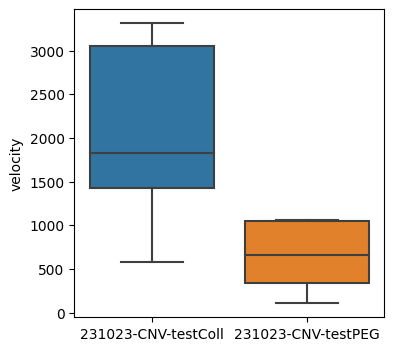

In [58]:
fig, ax = plt.subplots(figsize=(4, 4))

sns.boxplot(x='experiment_conditions', 
    y='velocity_mean', 
    data=average_property_frame,
    ax=ax,
    showfliers=False)

ax.set_ylabel('velocity (um/day)')
ax.set_xlabel('')
plt.savefig(os.path.join(experiment_analysis_image_dir, experiment_to_analyse + '_' + 'average_velocities.pdf'))

# Plot the tracks

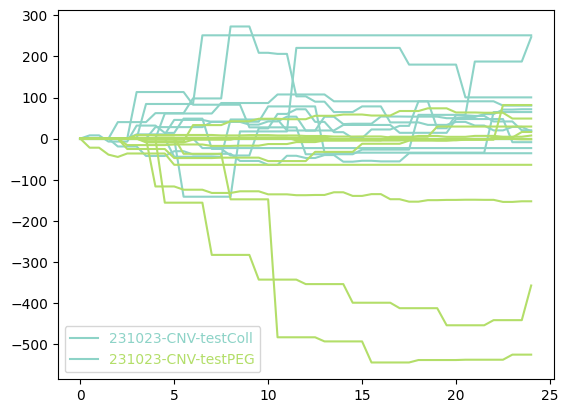

In [89]:
import matplotlib.pyplot as plt

# choose the colormap, go to matplotlib colormaps on Google to try others
cmap = plt.get_cmap('Set3')

path_to_data = '/Users/clemence/Documents_Clémence/Analysis/Tracking algorithm/Tracking-seg_Aaron-Gus_CNV/To run/organoid_statistics'
path_to_absolute_displacement_data = '/Users/clemence/Documents_Clémence/Analysis/Tracking algorithm/Tracking-seg_Aaron-Gus_CNV/To run/organoid_statistics/absolute_displacement'

for ename in os.listdir(path_to_absolute_displacement_data):

    if ename!= '.DS_Store':

        number_of_conditions = len(os.listdir(os.path.join(path_to_absolute_displacement_data,ename)))
        colors = [cmap(i/number_of_conditions) for i in range(number_of_conditions)]
        i = 0
        legends = []
        lines = []

        for cname in os.listdir(os.path.join(path_to_absolute_displacement_data,ename)):

            fname = os.path.join(path_to_absolute_displacement_data,ename,cname,os.listdir(os.path.join(path_to_absolute_displacement_data,ename,cname))[0])
            absolute_displacement_data = pd.read_csv(fname)

            plot_color = colors[i]
            x = absolute_displacement_data.index*0.5

            for column in absolute_displacement_data:

                line = plt.plot(x, absolute_displacement_data[column], c = plot_color)

            legends.append(cname)
            lines.append
            i += 1

plt.legend(legends, labelcolor = colors)

